# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the dataset and check the first five rows
df = pd.read_csv('D:\Learning\Case Study Notebook\googleplaystore_v2.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe
df.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
#Check the datatypes of all the columns of the dataframe
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
#Drop the rows having null values in the Rating field
df = df.drop(df[df["Rating"].isnull()].index)

#Check the shape of the dataframe
df.shape

(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
df["Rating"].isnull().sum()

0

In [8]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
print(df.isnull().sum())
print("Total no of nulls: {}".format(df.isnull().sum().sum()))

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64
Total no of nulls: 8


In [9]:
#Inspect the nulls in the Android Version column
df.loc[df['Android Ver'].isnull(), 'Android Ver']

4453     NaN
4490     NaN
10472    NaN
Name: Android Ver, dtype: object

In [10]:
#Drop the row having shifted values
df['Android Ver'].value_counts()
df.drop(df[df['Android Ver']=='Varies with device'].index, inplace=True)

In [11]:
print(df['Android Ver'].value_counts())
#Check the nulls againin Android version column to cross-verify
print(df.loc[df['Android Ver'].isnull(), 'Android Ver'])

4.1 and up       2059
4.0.3 and up     1240
4.0 and up       1131
4.4 and up        875
2.3 and up        582
5.0 and up        535
4.2 and up        338
2.3.3 and up      240
3.0 and up        211
2.2 and up        208
4.3 and up        207
2.1 and up        113
1.6 and up         87
6.0 and up         48
7.0 and up         41
3.2 and up         31
2.0 and up         27
5.1 and up         18
1.5 and up         16
3.1 and up          8
2.0.1 and up        7
4.4W and up         6
8.0 and up          5
7.1 and up          3
1.0 and up          2
5.0 - 8.0           2
4.0.3 - 7.1.1       2
4.1 - 7.1.1         1
7.0 - 7.1.1         1
5.0 - 6.0           1
Name: Android Ver, dtype: int64
4453     NaN
4490     NaN
10472    NaN
Name: Android Ver, dtype: object


In [12]:
df['Android Ver'].fillna(value='4.1 and up', inplace=True)

In [13]:
df['Category'].value_counts()

FAMILY                 1674
GAME                   1045
TOOLS                   639
MEDICAL                 327
LIFESTYLE               285
PERSONALIZATION         279
FINANCE                 270
SPORTS                  267
BUSINESS                264
PHOTOGRAPHY             260
PRODUCTIVITY            251
COMMUNICATION           232
HEALTH_AND_FITNESS      227
SOCIAL                  185
DATING                  183
SHOPPING                183
NEWS_AND_MAGAZINES      171
TRAVEL_AND_LOCAL        167
BOOKS_AND_REFERENCE     147
VIDEO_PLAYERS           128
EDUCATION               114
MAPS_AND_NAVIGATION      97
ENTERTAINMENT            97
FOOD_AND_DRINK           87
AUTO_AND_VEHICLES        66
LIBRARIES_AND_DEMO       62
ART_AND_DESIGN           60
HOUSE_AND_HOME           56
WEATHER                  51
COMICS                   49
PARENTING                47
BEAUTY                   39
EVENTS                   38
1.9                       1
Name: Category, dtype: int64

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [14]:
#Check the most common value in the Android version column
df['Android Ver'].value_counts()[:1].index.tolist()

['4.1 and up']

In [15]:
#Fill up the nulls in the Android Version column with the above value
#df['Android Ver'].replace(np.NaN, '4.1 and up', inplace=True)

In [16]:
#Check the nulls in the Android version column again to cross-verify
df.loc[df['Android Ver'].isnull(), 'Android Ver']

Series([], Name: Android Ver, dtype: object)

In [17]:
#Check the nulls in the entire dataframe again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [18]:
#Check the most common value in the Current version column
df['Current Ver'].value_counts()[:1].index.tolist()

['1.0']

In [19]:
#Replace the nulls in the Current version column with the above value
df['Current Ver'].replace(np.NaN, '1.0', inplace=True)

In [20]:
df['Current Ver'].isnull().sum()

0

In [21]:
# Question : Check the most common value in the Current version column again
df['Current Ver'].value_counts()[:1].index.tolist()

['1.0']

#### Handling Incorrect Data Types 

In [22]:
#Check the datatypes of all the columns 
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
df.loc[df['Android Ver']=='4.1 and up', 'Price'].mean()

#Another way to check
# df_sub = df.loc[df['Android Ver']=='4.1 and up','Price']
# np.array_equal(df_sub.Price, df_sub.Price.astype(float))

TypeError: Could not convert 00000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000$3.9900000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$9.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$2.990000000000000000000000000000$4.99$2.99$4.99000000000$5.49$10.00$3.99$2.99$2.99$0.99$7.49$2.99$1.99$7.99$19.990000000000000000000000$10.0000$5.49000$39.990$19.99000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.99$5.9900000$5.990000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000$0.99000000000000000000000000000000000000000$0.990000000000$5.9900000000000000$400.00000$2.990000000000$0.99000$2.49$1.99$0.990000$1.49$0.9900$0.990$0.990000$4.7700$4.990000$2.4900000000000000000000000$1.9900000000$1.990$1.990$1.990$0.9900$0.99$3.990000000000000000000000000$1.9900000$9.9900$1.9900$3.990$0.99000$2.9900$19.9900000$0.990000000000000000000$0.99$0.99$0.990000000000000000$399.990$2.49$399.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.490000000$1.750000000000000000000000000000000$2.990000$4.9900000000$4.9900000000000000000000000000000000000$0.990$0.99000$2.99000000000$0.990000000$4.4900000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000$7.990000$4.99000000000000000000000$2.99$0.9900000000000000$0.9900000000000000000000$2.99$3.99000000$4.990000000000$0.99000000000000000000000000000000000000000000000000000000000$0.990000$4.9900$4.9900000000000000$4.990000000000000000000000$2.99000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000000$3.280000000$2.990000000000000000000000000000$0.99000000000$1.490000000000000000000$0.99000000000000000$12.990000000000000000000000000000000000000000$3.990000000000000$4.4900000$6.9900000000000000000$1.9900000000000000000000000000000000000000000000000$5.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000Everyone00000000000000000000000000$8.990000000000000000000000000 to numeric

In [24]:
#Analyse the Price column to check the issue
(df['Price'].map(type)==float)

0        False
1        False
2        False
3        False
4        False
         ...  
10832    False
10833    False
10834    False
10836    False
10837    False
Name: Price, Length: 8048, dtype: bool

In [25]:
#Write the function to make the changes
def change_type(x):
    if '$' in x:
        x = x.replace('$','')
    try:
        x = float(x)
    except:
        x = x
    return x

df['Price']=df['Price'].apply(change_type)

In [26]:
#Verify the dtype of Price once again
df.loc[df['Price'].map(type)==str, 'Price'] = df.loc[df['Price'].map(type)!=str, 'Price'].mean()

In [27]:
df.loc[df['Price'].map(type)==str, 'Price']

Series([], Name: Price, dtype: object)

In [28]:
df.Price.astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10832    0.0
10833    0.0
10834    0.0
10836    0.0
10837    0.0
Name: Price, Length: 8048, dtype: float64

In [29]:
#Analyse the Reviews column
df['Reviews'].mean()

TypeError: Could not convert 159967875102156449671671783681513791121138808788448294326151855363227194216224399450654769911819220260203136223112022750351015353564814536639158591117176220626174531107085845367159828412954210479805129140339715347774388462431609029519052530116986137927192073670211977373574994197136142151682155138541434825036174806657863143350971754268012881890049790115017392225436985729644205010460136187301347435959315753826834227722801849364184736638712576218574478246315418224861435116507904688603639349671750618622084473038584278319161546202133626875177827098342527132216802739106587885126930105156341157851857099110028611658914894544586227289414635367000308471888414034459646903316141902320737212253808371060074359822808052287416214760808052868971037554650511442102952962931370991180213832317558685448415920815786627149307958006989164221087413161462416613086989521110582962931370991180213832317558685448415920815786627149307958006989164228080428689710375546505114421029510028594132317524005571062249516834101023897030243873391442181939651446120883141519422551298392791677757115125995221155198135961006596848951252571429035158679418799865939547858926660230209369011929481369820769368806153813305336481201366624237020832375413892939407511771292225021271874785988122498132014832395947282876500282383356463493843469823732012842860368931588034698022649165413894292536484801771485013100550981133501125781096518247190613125232832397206527540104990177703175291772632374683225448356555244193825152872057399498418814288427183374209011225951243462554142047859885947282920819103215455722857262556777961637126323137244884531320172460419511633102123705366713202115721262622288820671643105341411806199922544976842519114613046172688722953259353778522121972352065164193927780825400351093160122125708124163986788853550842430285726488452556777983712632616375377116333137247389534631222888172685164495341952126261439164513204853337130495169892315461491982254587232317013890570835371344014310598946191221215081802183520524395023651521576670140039742187250618298686618593528125185611035842207762141518651113101120246495495425605910212105286516812633416058218324331858035512579111053234788256915824531829861157976991818932544853753142999770323464075106119321560651428613313639010902669483429187481726406116193168673670058895741275721085298881929151642325451985375181893990203238124855527214556897859930435811904222512238499020734042518352743617495570419277136123786218372656240275369223634307563168537518189399020223843238017250585997973266935142632552561725085479848157511233646314300206527381647847161952063241835252520005812397021485503847552568430948151725082669481420620653214700378621405148549843112065321725082560792078161031121310853528116562967714700891093952412250810291697910307817682370001828284684116469167029753245823549611661653008230634116838918296901305496130591633682264621867653008263915114455024421552341221692058493333871232792742460841297062881501480731969235928644482237829682992058123279319691608412881501637258028333877368642970627424196835279359311480717247877231977748674296771123279319691608416530083338728815011503380129706274243527935931223781480719777486748968303185650725123279157523666675543876916016437712566643782707421532061181115558573823238744647316988009945658394663161065124298110039928712442452306426442780826076112656319069579731671683442815247484452199613837112073111632250706649596597415103927215255086044938178810697318043856133624625728312304818811919215702831696111125477315928614886186622313069973131126587241710542516619870359616144075144610615141714434442809192210658783611386811066818837580685378015192595015993590577316597601462710982898707821126410099732903410909648795125071951040124729783064331313745496998145323647843299727076111362473109784332061681038412107413803155944101592800843614455377139832405225138509193142131473145414952125017261406555649256507107790661962196278126891359220151315693198622875170719024246415594422875769032113437552800933320835218375172929691577380983113927233722012540059220098117925548021482764710361270570646564462381440405122719991162071502947086741140147091202928802702677777786421861120329911572118366227393104454947948482052991836695420130104251534289516009610654727396708710109756383431157217076926540160819074797675864822610262894511506128811689775635499707692665271269203015614520326129552681410257024212183812858506791694362327396708710704161567427029414405018366925153428951708753274392490240941853930612054734052177895132427439249012601724094205472469306118539340527029421778951324143942654018124642165704822628945038115063166520529957634116897756370769417907316716224365913249776000377112758757384811005410117352236857230131142874435428175084912258440872669761912627322488093280147823824450515446524276631112006896443536857848116224341790738342258481583014923670075391268624814659297834344112372580130272130739658055170377506261919601708318671201459122639399394537811267189684749760114099551357135653936472871611431616810011607981589398542607260743829335726145343277457419418214510944665216753652189619412966322252316430319555778694212173686554332643478266761067179720304737649147691773448106737881658203043309987520878298348026808360166371797959046808360166371797959053114220331533283013937894204213213100972858810544334644473882772226422426677254258148897369203523416223133508811860910485308149736159800261052640669893778921619856310306448917231000417170396859811039314198297592068173226329524111356315566669129555727068721579305062752300568057130049089235874128732420532577249904917614130760628988182921233812772319344473461048533414198602448917232242845640669803197865135106854186759881908148895188925018384623071029530561988802157930546562459854153446623134775148912231137271506275261062299058610354811893718985655067761427110434523482513850932698348112501798826395566805746735387639275041012956064611379469269305444879114986482772409422428456135108936063011372671420034452348106074334811893710004175922821535084811888010424925230727370234222449812321262118253141529702262251012302531576384911464169469267196482566427773258255538014817737156561016862754471747554578476145353149937353145837142701955582994023072741975216675231178516588854114411073102916818977333775230933584207924041632506707473588171540321477710060913438661687175497201899625094930331205921879724849812055735395901758291862119922211197412181251079513004382079394337913444988222429716388358914200550271914211071973716278931595165928246806330917680733844643421481952246658412632551902182125242045554745684416540166015901730574812245142624722430188444991014201891277253526199095104931489451351771188958223136735448938887614415406765129557659907104601048601881191511295625309393223084998833675235294319817610055521412966521585805065935419676990723592504218921138239988380619754074695556688926988821535973148924698923818112543829445655145547656927725352150099942308868119154523529415359732698889990663211921813272651842101003269124285540142510979062515657955656337913725897549039155965029216452096213818205255176961949693275993816799105385476569105620371391477913478833432633543737530434305515338155930732512664921510393067642243018840676515990715006221420160428009814899026985112543853877818923847132726923043421451295625990796171448261068013006192123793218926074627104303556690827506454764412564743552119235214878811040153634959250417044155186112556654196763449426065146381637614407234110486154706944214544499101477412753339832026757611161812948685977936937811436215048615382249361109974108795145510148228696173205984318616119504289682861171633233660632861946741530854705023590617753520609432320294207649682471496202672943619230111262367196529626293191791919914014103664764412137237640463561698244508558696148701152465206544076530904106750337854207587953235470311311146732032178175625850834843794151924524877765100885255523762141363472584132919214829541273278392596430605140884186710148462306011208015489518954306052555262339847258466661104471574197191701696096188136929527319856107531542885234522311008545601976318623772600729033617306332342761595879685596111235669738438214248185219516153593802161906903131554964181160599171042733822533396380216190690313155496418116059917104273382253339644508904707135972913311710879547213955376666051838360285287451696098247144062392596796672076315742041233222931981266233985088763160131552873745579197203619701596193543842723211296031135578129631714571729211533921991361121520639515335775121410484528010156178168251632513397431217334924162512641142146659158731181028582094236330337882518674250626653743265744761564102006609923160834878376185380318383707315874182118917466912645310710700914158755034881901526862100082277216721603599454318784723889650349830521747451686529138857292113521189542752159295129218455212108736340817133197272485212153351381590128815451992834601298039521417513168641688281129283363437171372061293220313424232110281145112209449687418537474410124201450321115737001633304532416865312035965692763265731233152261221762366725337861106665174717282921923160491732249214034919137626086120076480271445225103331775476825562164042508796583741259075475160562220982313251322347990854093057146122533919583791293821204127251259849115700413802642533098724799091795551502583411259894115700316161019446122536733249515041259894852455900064367779129382121207712205279130125989485245590006462455733249791301416136210998942946087533896197327090922615730548579233556310679888203718625714442551825242750365621674166228730834367290258816265517158424414114251210912413504310859213152424873230823417849768406183641586791892318799757793970131519213735621103942871315908792612847256707146153101883165999752852337253284721342071932278512139735970115582137351696662110394198618611613085315908285234458841581057739092042794283358394205955204615368406181798142512397355121970113085285234458894205955204602725961104252375130853549738783358368406440716212081397355123181823192329871610950021159132050424323983895314263425945012302991480421841528257810349859402893362496803378105253492654419186474476221858311631985440011677315804756114157001652326361285788441058552330392857811590585342111688021730624217018984715925195198716654418528255824047531579365542732916042677811693234403368649420792970715098357247189848650931060804494112927211106649553701898471592519519871613008114091788860492113512541575061168802404753475363584678140128652153433368646753115486510749553852649149449181977433439351255477831126337240475154261490732116323211468091491731581517594559167652811714107527733687059372682310948651324955319729521578307453328969871754256131581514627025211381802283662133825911995173334290956270107724101455910317634639878152867635801357631764481981160169992218401125172141232487180938950232423166424866975510454991031521138176448133825910312888094361152113891031784422888093017362557521923092637167202079875431845190411085338711151296735001763650176450501794361152114099711660361240821338339103399032386101521140133833910333539432386288809288955211403412340575517427299713429126665211338332943108318754391033323866893580900288809551128895501791115113662652029491906471348154560121787826871337821926412338655751551247813286216101985851366334598515572168152277455622852562750708117882439352510372756048154615093292826665132754893015680511230447165299620534599872344273556011182167344893030447136626203132574024781425462428152028180392756022748770548154614544134895480822419489301609136626481546186228258178781720214114890481546149723676212037340225997118294386552419912759663308261894583825592123677906933155851221512722396022415174819185131455235731516399754315912414201184395997332111704048768662077061663671926615420713357991526924821112388853873350990831856598072426516575764548867556848190961116393154578406763983327328313948080105465597110732033511533926134203156934897963712949642858122554447443941137753367452451729906830971464965717241392583279410292367027767583507315633294851423937168811485162209202474298321578344147393555252267649568634254134724439603277209229662610796273994292031891820564406645339812089282889342304989789025037586176230137237159129470163624112977580521218011845911247969417733838157495864814849817772433074357712902416948810401288061134366730258072516168816249245114574351157731200820841261188154822632528961079491112009653586754806432131538398585502308956403193025770596187982096961498393185632808474141821260111795574146176873102701559995671372513205191736955383971497946091829795301567523174152084125107961654990061879615081374806401232112242421507805813720422629557904155999480638898516349259851027060840102594685018669164207143286361414133937891075594976449293623861621002994989073190464717750511501692715349378066031982466681940102533465343247318215283976795159455892111181537018194406061333383690041841009942000813426187737623214043478243492215417493159662332293446341842575575908915511276425900340039301032076239242193381762419738259605186999881953006351168161559634842592255559218686449158742642136969457447146656685132051261121515962216996538630426242641129706606629308035592137882190888954810711190818505897887763517511035794473525433028731504211474149020904427470062959401674332413999663841770335074425877635131028331113801858844097527104247992636475652413169616921897662740766772930807815447959423330523292236411321718976409751724029308025668063647877643131028104800564431421884365212628214110187102864546521620492601453562105622158929093793715865639203837516657301413160946559032225443482327912572705561240102181688188571183816233588641837209951239821334018053989498910483141381561410247730556585626345439480131114885236174864243576277117031221896152658147661852384353342672089305317034791042128498763694698518389714685450867920798522676013118413609101346511172129085253057659832427931476981331951295293170691450884625320787441117415152404927529265857631371982219156374515276983310611249551299680023494219446611418491015950799206230398891305050155142102916258344871821266829481771292283607154210053186815280248194722472832534124488144723125280222483494624139794422419455272751531873734041218885572387686809649960824707376109432751778921451130452411545955132027306498361002138201971777305347408292173610550914482588730208323742299778116142640974305868749722309511591129140261013867762706258626191171107624340648689873470153011015841477181168959400043323682338449187892740154435210819491063773537879515067831065773682413544082951413165727156324951814853616257466014768584221053462007399400142903889443513024551127263213548394357214258811176079433731250659395130963816495432036858183555941759838511273697174112880564884857215206512683365610341205998934453411677155109654389777255254152315173330184614858069929019604191729544178661816401231451981691340314650615439381030642144108126621325024671633565107681176104261752017178723245419758478589231335947207453463552315538137137201330324039112493083777822298642502571320158098789611842100098915890082838751838090307398463743921761625476447456259705805212270518533961264132900840582487973681747286091771649893429091401656808101740811851243241440461955106519047164390194444641839287127372155235160423915964112634304173692647032694969972256696019452243570495762102308916626311119156741030656772965155276115355525425111851489041528521734852223085566594991827212315382363723458820758780596841202184198303307189013840027571266167229280320214255910218923460612810035253815686263680197274719325975521660332539601331804136208173693133778935704892989947466306307462133860029229505106169618765939654656802051551684131475148826354169911393925736456712746140304432240132414832114020595982618069758914542826875900993829423020268695613355112935821352161253147306284511621161697206124502164182118914314866627691264383680246681378826893591411219420124143215665713342641142110736424959716979396021746015975735744434079445483953691351852636741725956821696513481776872351068144902925165525169677751461124414224517847628124359725744649001509790146913225031503544578556033416111142789775174827691158081638606751820100674805314422775370963215921031381296454179881771846548146219431468131108819812975682105710490166006761166012335881668869363836487658397757312485213943878433165534331571117821582624521056883712198245174685599522414435114049061011889457550920931092631926772411821031687621136121103104516572335464306431615418542987947342881242399347858215924328390329287594450277219971273092460174458916678565111291507205382142237154310513714424244735209775492121216510195720595080113096634815461092106406175754540631166375841925142801168487204185836612164210121471080635583714922018126305154878252326138642161514171424210127365658660343210748916875161618612882160589838517522728144811319377216461499466418834528581435126716936130549748424587151804804421387958229329970718534955894960282954301216121075016367951198765011460541444623014051453976201165511258114083069466199718291360414224198246978537180295401336369927217218862531151055571384602227401596628692793881752162839082105261032826346053282975311145423719651039630527206738463785335967121805579327501211860412906224409344786425294722985432704027141781640936214760483043273361138332631041126377448822841664523291353114340664731450129811932332566130163363295145107922115861211132265084297610752088769300533629914177470518751107252431003195267711886961067279992046267164024137302325266317293314571555182831513432017822047629708394954642171636526174696030002526241759456918277721177614178581191096414258835880453326323845912055717876472692614745312087716522421013672651300631245593093512221137520339611676938055774794626530764846619909476115265352312306652234535089322159013881141641858520762367381936813336430375629512293156441536731998530412410881689525645458486949768092751339116973893597197644825627405531327974340228322087529264162420189186576634668131407320914325371893617342975156467503873747444410744131135122982218911342214851821889342691611031345656585217347371658072263229162397125214593113431065421597124312123338124728382827803302194597121821845112915740044575636178041608995223197878669648321733942654136201991232229551474631340550117116759177751812013234354714551415848564111867419347213445920120850112921321763039180681264581361493453758493273394410256484858800493150324583968072210317133333889974823729406511179139104389130689234971722022570141452592122332438911206345771714819209294956662461721943821958657951917097362636123136250197101218300414308765294033638651959193513816249252245370412693948421008012302123114431480833159659897527564164160637661622368411717718822194525235131101867633478558821138871051316675297010242137433719511294097226671011447042811265575416614251560410001616372188813113424272224403972068584389137696322976254898224353089441680190639132528735580160862171226514118202476364013631602101723712813542114108317451315320254692519596362215317115220293626815374028420879763404374239669611141256521407448113792057283442832587178071554802082986745001322813011773870928407788118285347086379245244565119348988894251041836179454715110776537165174127470673919532344819933510080515875231682628235486271724123772821805922316162596197666982126640412691278565369912685278165217028916676642121185440681176232433182730977625816128498482360924312578742272946215906329469761721525612753734325827717114342270124202511190117064117415025992598579574719250789827249178629955614826483807317416591487252158771824992906211484202409522942097354921141604146260137207983461156611275424775384524415765305141454621924569298521756158062440699453291715363441012671044698211211111121213724892327411159895162530397792545188890165146104551663212927075191115209711087264262332272860227241324637031624424122013861002851613943109530026513651123671261271341494025726312387362217342196203032322666322851491135921816902272876772782679826364724209686234525301424169661172744155496251131211049258473615111383432720913825820720711121443451373777461120173910910341193214514765393028954044969247123931971654941123820512474692291421031233479836319882934915332715671396743968418944331564842078783828066603375574456054090310348545183451011433048422628390786715805569291461535581252055959730536712836710390976608275843123309263907321849633914130662622562889263415932194281542105170673322250976995194471729798412723407107363056509364742264387198116172182755081219165641611127635188318834310310176228660201011044010267378201714269347802076711821187340791439164416307107589612544220583086714453607912926816740681756402717180141226286271167522055242125329721957735479742010581991505536401819180221643231208423663762282733728479545125644637653137691212597231819612059143412342994421206715569428583834438310467640994722695012261720133816116161103401032535121341381023326601556866452446717352199633349569691469206611662674480216864174724481792833113534202484166341939549430892927730125445301160150810010610222441606164152614304268333793378312523014628419442051563355190160739190452152131898158551828923267213327949612843436320976579878313841968378659152027106262219261879423882732811172159163818566125399135977821424572344718614624455331203050131727631551466181741448353503133661468014165559165314324471311671437334881255788773416414283620675515691038297159398776730152709031108196944451317124301766740691862557833033780883471893596332017442361717825530991523012311247431341129215726325701225646191671861826825941382112243165161830683134662774977280302427571911032180420691859232130287586546414131629206812881902141827364371016109130446713201561167245104587981754548947515554613304999667033515114168554456102696114803011895847196403337427113847484512215665370327942516323254328081307973364121919264371220829214437426111872992221356763643613632197915816198337371225572947104721002216738693844282310047092381191433401528698826815057101981327924977624555819784400151000624670527192655011254733332970570482839962048486764978901625035586144457841137611109869417517125728411420513131913064120342211013483191131745551384482278258588251067130051313964169313873991645411074972997664259522251791513142308542212231138041274412784258699224557160412672295572314356997149072223474122932017358876712792229034279734230914788075706183343213548176945452289112223210024421203482641977305690362561901641625284337268828127473615334212626964983601255575362019212144623314124291213162191688700016541043974754632094556305121799889364901521785563829612713083453819166571326511267198151731452251120142644261385152320952371064778262701008125271557962190316921211431618812834332683454923227363265885187113951658087144040490115988421321151757511525221231661432809461229311751366654913151705473141116145101183459692952467131431521187828274661231213314617945881631025541011514254399501045661647271363560132324924169176410845315509162313110119259945239011164218587152128883521452212933029990763489627531995552099102240745923154519207125635036412414439898118253337125439038940317372788581221136415564924456229488820660211824691030219821317141528332167144545104349503341002480128810774611194578890474870756185712024223368136838576415109519448803967210236670084723802224637985496262076717401663633341843288911248239898190074319850791009315004981147196617612642467519829291016373271803148471441094917662712359521298519853863204638521979920571226353953044425691637513408479604521433820051200356386433142462839698121533107761725013519391535197348754704677382499642108336412410739041213145631177861991757099878100115958112877782120637316880383203275420963386947162522657265159231224841713710221541233319159111147641802681725194651282038460770228592958242236187101879351313228234445562548116344437112436557878475020157591522871192078424210447831921028237324713455222119368455249910813029308687781729839569542218706337975117850167974263047561337883231475473898216920102026822634462973106607821918234101147561216724205277717371243447614032822773263585216329904641089251019337252623286551254332633494616459991310152117514823866852112565162781252087834321116214604160325343146024785445568345610367613736624122534185402711862831561810398819819184863541123569334785348620848029523742531231207231314117366180573225632319619929224290109247234349589212667409074759441151761098185012108245712136253757955577088214748397237411337139230348942314209218312782024424425203807152575135931143141611474022426997349961252555541228820916391243675450846165656393510649166141220459122652341123155211126399414361546784268113731977727306979208431376745042848141918624940691756347194391012132111818442147103251731219606065431617138716851174395417322747191394935718232247340310159578501522501122262141117922187815144706011876137117118928025640916739817401372213187396372301415753164142289307115112400528550353371427582674051766122010136540134412388241710176289260527419375153649246493898525289172761054626143989579405811968530123688993338742234569312038241996514371547704591791726512110064375217853323129213313954355613504765244087767154309025579371395452233324911733161903424689153041061138118620166312461282582647552354042689522160144078359163391801866487449754034473862677874988949149191621328492516862520064837822869478562223458911318395143545610257531198480375996152102171081764241941340881171110047993921648186684703851410318391959453301124863271078615843670062812241543533104068394112931477418784781423260423517228633331692352715111301263076450293871686387675623104401579978183545340621484152395371597539609041719723466495416839665841288823144630339439068390903221162060264133128107552635217736164851555952609186771001617732332623371318696665860078599779620132925210952130101628426866429255955613871923156819675266321117085322512411938820465385165059118612049463779132396821847812328798523346122593253207233481334624240467161928025898117714871524565132259632878038607902835525942111844544505150111527761164325985534263786156181605052020552979411289905118723640137071307948562910374520325961664564742673954535925427144322262952531557063549900107315410815599872161430886320140892645261207801574497566464910484253786172661796968856664229512901561811402100740164881939711151853162378718192217578412836710786623392934813123003481688496946341315666625931213839199112111132384213230274233641843242781231661617965925761937333581456463191128140548511250155093845019413492272236213943270716386512682702138158575328816102254414554968447536935863323347162614432142531582910173837255367163345200450421828727002310384785317265541013231124199720945181463397358018117481205267183764291388721091117882302222198537251357192916887766140022289610777822181067625967185249082046322725315763682141552962137683521423223828775761291417563112203216293312749224773911010190086386377913129362541011817830254328137338441819973920616231499168124249851275981575781347963343661546583167707484711335392176220941939305174935192347605129938681405114194595339050023599313314101163321265104876611656923218616121589997299253146768275511023223770311841211382138611811663484152252662014381642712831767190244322843253862591023856111829829896197610373375155913935651716697615641655259643195115222811506846449636271894767161822814127335164645513635546131215963303721523959691763237632167120852830321185280723182896424882058574571238833311461035599436061312388261710601254172611426818862510580237133816908023344300354454145595228272763699556763214616986957432344199808203101564441220163132600938702226641662517038917228156798482057732496290338685484449019953841942767140658331785855643311729716829154103930239534111315537111128177721828159216166275493429173017347303501063316112013484518437769141216262282651576183757132357411440320889496190221015027912424351626817232622041327981754634596958311272216539281985053222588356105294017265474249724278377691325663192799339461745314773228283691506300081100247576253318807379185382115148405209771619784101860113388433574612813716772032676361294234160736481550751256166398635933252210362713015726415732276627529010943266896969138050224866110576680313701144242314251559421191468494600905172214692406785909612781085209111271791535160787045343661013731410458335855333666976496715339673523104132584873184825551371424014335989162372114995202921408831642632812809148352303048101313646712163441755995482191196122776316905237251076978051812282196281021424321823633519237448714234311357254449210176667531705943083240584875115635956133840801120421593336968365432346422330222119142380552659542541614238343131865256197809042074402923244797790431751218493812102797244163519027428507006128462714216143910353283129412208198606871468910051667311447914898608149897107127831211308200291941187200246538177542362552620265777243570762002147881442332919015118241752072941628311077361600137598836445271328951341613811021510534514288606151374206262315006018874015745462329243852133304636919602178291552200151692674144218354495731110231114131130174545291396617924978014141515254861227196012580193851916523964774127813144293253482552801173154252902321412525420293632635152510113047983246545171201909286626919581045810449816141717711236586732207238591442847372787851208657760911449119402651324789442491924350941103807252333753246058407043838679155313032498027358391877569302932870859979378223390988780653987467088320171849971126408425161817421512251211238419336412609039520146068833730556394736298833444604427087413186568141919673581310242149237275982160623823220035961959287964501891853254472646106181810581497526298830132080762649121825585886851754336813938959660233815182822539931222322335661330137529033929513275576127229307120007362562199002409155110701051325384779838912548922945683919699287281116342645872316821152231033257123164138130281518109218280115103258151550889432129216029815171220225474540285311144877371532213218132749948320198775838754082222497744371263383674431919363407968017090316014280127614616261892671833344691074951369673003353368491528786260362412511949318732595553374071420121249580226504518463317971663782201537110513882676156461764872642822721923150701001793188671723732543838954262171024456190511211074337090639643452856802521427324474230471823478279606123640201106644410605337108384026019190544612071522117495229342382670160371406761389747952019758590158834019139719521593571912641441521697215265675531045015410749231721610981166751531697291754354146310010520100716458521213819104764223789215179717183704183581061539207554076941224912522195534114225762422252141130384875586494364544027683671164854108392062036412282634771476995002294157946472522387829802842960097350292961225712919812222169120140213105320334108302742815147318523218584247687136106320272654570753243121735224929178342761542487515036197481372771121541346932673685239015142479367339691171111511234623724910423.0M13420337132552128438235431619783210715424328610323066810935976826224105954207138473452589218335171250566061322570182121628218710319933788151712954214201127006730189512112527511923614564768887160246148187582251014627853148116133830176567011100735403406566536763614392108015667633411416875514221531261333121397178549987144889135183346320214332013313311460664071814420931241441398143889411681566159220710758546836183550141281012275048191619519257153176727968358114516256491832831369811464911180960826252222271908332083410121321326817831969894316378848432169638253148335991233345842210786359224528637951714049391351783411725234024545514054552973681035128721661285107339614453243320361745218556496544233762231980785577588552221172916038811195447384 to numeric

In [30]:
#Change the dtype of this column
def change_type(x):
    try:
        x = float(x)
    except:
        x = x
    return x

df['Reviews']=df['Reviews'].apply(change_type)

In [31]:
df.loc[df['Reviews'].map(type)==str, 'Reviews']

10472    3.0M
Name: Reviews, dtype: object

In [32]:
df.loc[df['Reviews'].map(type)==str, 'Reviews'] = df.loc[df['Reviews'].map(type)!=str, 'Reviews'].mean()

In [33]:
#Check the quantitative spread of this dataframe
df.describe()

,Rating,Size
count,8048.000000,8048.000000
mean,4.179573,22903.084999
std,0.563354,22920.417359
min,1.000000,8.500000
25%,4.000000,5500.000000
50%,4.300000,15500.000000
75%,4.500000,31000.000000
max,19.000000,100000.000000


In [34]:
df['Reviews'].astype(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10832      1195
10833        44
10834         7
10836        38
10837         4
Name: Reviews, Length: 8048, dtype: int32

In [35]:
#Analyse the Installs Column
def clean(x):
    return x.replace(',','').replace('+','')
df['Installs'] = df['Installs'].apply(lambda x: clean(x))

In [36]:
df['Installs'].astype(int)

ValueError: invalid literal for int() with base 10: 'Free'

In [37]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10832      100000
10833        1000
10834         500
10836        5000
10837         100
Name: Installs, Length: 8048, dtype: object

In [38]:
df['Installs'].value_counts()

1000000       1352
100000        1069
10000          979
10000000       900
1000           696
5000000        580
500000         494
50000          440
5000           421
100            304
100000000      234
500            199
50000000       197
10              69
50              56
500000000       35
1000000000      10
5                9
1                3
Free             1
Name: Installs, dtype: int64

In [39]:
df.loc[df['Installs']=="Free", 'Installs'] = df['Installs'].mode()

In [40]:
df['Installs'].replace('Free','1000000', inplace=True)

In [41]:
df['Installs'].isnull().sum()

1

In [42]:
df['Installs'].replace(np.NaN, '1000000', inplace=True)

In [43]:
df['Installs'].isnull().sum()

0

In [44]:
df['Installs'] = df['Installs'].astype(int)

In [45]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8048 entries, 0 to 10837
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8048 non-null   object 
 1   Category        8048 non-null   object 
 2   Rating          8048 non-null   float64
 3   Reviews         8048 non-null   object 
 4   Size            8048 non-null   float64
 5   Installs        8048 non-null   int32  
 6   Type            8048 non-null   object 
 7   Price           8048 non-null   object 
 8   Content Rating  8047 non-null   object 
 9   Genres          8048 non-null   object 
 10  Last Updated    8048 non-null   object 
 11  Current Ver     8048 non-null   object 
 12  Android Ver     8048 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 848.8+ KB


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [46]:
#Perform the sanity checks on the Reviews column
df.loc[(df['Reviews'] >= df['Installs'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6183,Revita.bg,HEALTH_AND_FITNESS,4.8,10,4000.0,10,Free,0,Everyone,Health & Fitness,"June 13, 2018",3.55,4.0 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7147,CB Heroes,SOCIAL,5.0,5,1800.0,5,Free,0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [47]:
df.loc[(df['Reviews'] >= df['Installs']) , 'Reviews'] = df.loc[(df['Reviews'] >= df['Installs']), 'Installs']

In [48]:
len(df.loc[(df['Reviews'] > df['Installs'])])

0

In [49]:
#perform the sanity checks on prices of free apps 
df.loc[ (df['Price'] != 0) & (df['Type'] == 'Free'), 'Price']

Series([], Name: Price, dtype: object)

In [54]:
df['Price'] = df['Price'].astype(float)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8048 entries, 0 to 10837
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8048 non-null   object 
 1   Category        8048 non-null   object 
 2   Rating          8048 non-null   float64
 3   Reviews         8048 non-null   object 
 4   Size            8048 non-null   float64
 5   Installs        8048 non-null   int32  
 6   Type            8048 non-null   object 
 7   Price           8048 non-null   float64
 8   Content Rating  8047 non-null   object 
 9   Genres          8048 non-null   object 
 10  Last Updated    8048 non-null   object 
 11  Current Ver     8048 non-null   object 
 12  Android Ver     8048 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 848.8+ KB


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](D:\Learning\Case Study Notebook\images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [50]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

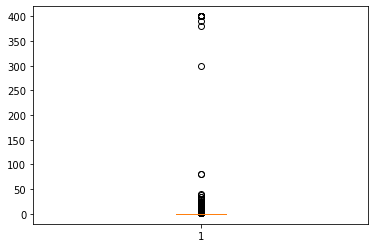

In [56]:
#Create a box plot for the price column
plt.boxplot(df.Price)
plt.show()

In [61]:
#Check the apps with price more than 200
df[df.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [62]:
#Clean the Price column
df = df[df.Price < 200]

<AxesSubplot:>

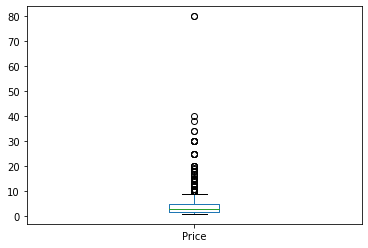

In [63]:
#Create a box plot for paid apps
df[df.Price>0].Price.plot.box()

In [64]:
#Check the apps with price more than 30
df[df.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [65]:
#Clean the Price column again
df = df[df.Price<=30]

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

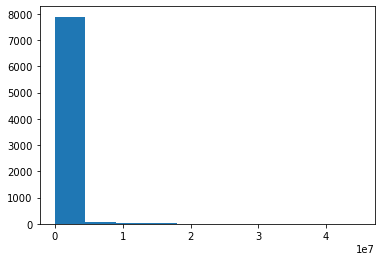

In [67]:
#Create a histogram of the Reviews
plt.hist(df.Reviews)
plt.show()

<AxesSubplot:>

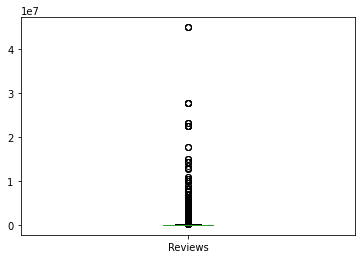

In [68]:
#Create a boxplot of the Reviews column
df.Reviews.plot.box()


In [69]:
#Check records with 1 million reviews
df[df.Reviews >= 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1.00286e+06,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1.00286e+06,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1.42904e+06,21516.529524,100000000,Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4.188e+06,16000.000000,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4.78589e+06,11000.000000,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,Voice changer with effects,FAMILY,4.2,1.2609e+06,8700.000000,50000000,Free,0.0,Everyone,Entertainment,"August 2, 2018",3.4.8,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7.61565e+06,71000.000000,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2.72192e+06,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10327,Garena Free Fire,GAME,4.5,5.53411e+06,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up


In [70]:
#Drop the above records
df = df[df.Reviews < 1000000]
df.shape

(7617, 13)

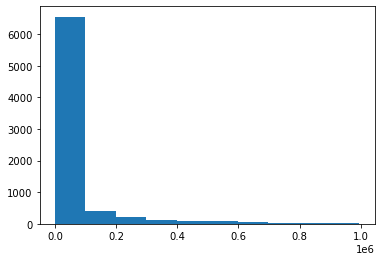

In [71]:
#Question - Create a histogram again and check the peaks
plt.hist(df.Reviews)
plt.show()

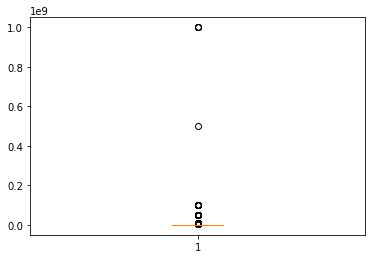

In [72]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(df.Installs)
plt.show()

In [73]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
df = df[df.Installs < 100000000]

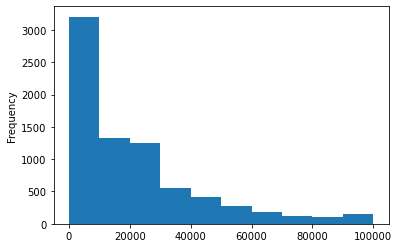

In [74]:
#Plot a histogram for Size as well.
df.Size.plot.hist()
plt.show()

In [75]:
df.Size.describe()

count      7591.000000
mean      21649.309399
std       21965.559980
min           8.500000
25%        5300.000000
50%       14000.000000
75%       29000.000000
max      100000.000000
Name: Size, dtype: float64

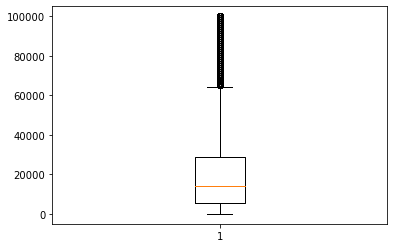

In [76]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(df.Size)
plt.show()

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [77]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

In [19]:
#Create a distribution plot for rating


In [20]:
#Change the number of bins



In [21]:
#Change the colour of bins to green


In [22]:
#Apply matplotlib functionalities



#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [23]:
#Check all the styling options

In [24]:
#Change the number of bins to 20


#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [25]:
#Analyse the Content Rating column


In [26]:
#Remove the rows with values which are less represented 


In [27]:
#Reset the index


In [28]:
#Check the apps belonging to different categories of Content Rating 


In [29]:
#Plot a pie chart



In [30]:
#Plot a bar chart


In [31]:
#Question - Plot a bar plot for checking the 4th highest Android version type


#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [32]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating


In [33]:
### Plot the same thing now using a jointplot


In [34]:
## Plot a jointplot for Price and Rating


**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

In [35]:
##Plot a reg plot for Price and Rating and observe the trend



In [36]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [37]:
## Create a pair plot for Reviews, Size, Price and Rating



**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

In [38]:
##Plot a bar plot of Content Rating vs Average Rating 


In [39]:
##Plot the bar plot again with Median Rating


In [40]:
##Plot the above bar plot using the estimator parameter



In [41]:
##Plot the bar plot with only the 5th percentile of Ratings


In [42]:
##Question - Plot the bar plot with the minimum Rating


__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




In [43]:
##Plot a box plot of Rating vs Content Rating


In [44]:
##Question - Plot a box plot for the Rating column only


In [45]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres


#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [46]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut



In [47]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating


In [48]:
##Change the aggregation to median


In [49]:
##Change the aggregation to 20th percentile


In [50]:
##Store the pivot table in a separate variable


In [51]:
##Plot a heat map


In [52]:
##Apply customisations


In [53]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating


### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [54]:
## Extract the month from the Last Updated Date



In [55]:
## Find the average Rating across all the months



In [56]:
## Plot a line graph



#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [57]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs


In [58]:
##Store the table in a separate variable


In [59]:
##Plot the stacked bar chart.


In [60]:
##Plot the stacked bar chart again wrt to the proportions.



#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [61]:
#Install plotly


In [62]:
#Take the table you want to plot in a separate variable


In [63]:
#Import the plotly libraries


In [64]:
#Prepare the plot
